# Matter Power Spectrum: EDE vs. $\Lambda$CDM

In this notebook we will compare the matter power spectrum predicted by the standard concordance model and early dark energy. We will reproduce the figures used related to the matter power spectrum from Hill et al.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from classy import Class

matplotlib.rcParams['axes.linewidth'] = 4
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelsize'] = 40
matplotlib.rcParams['xtick.labelsize'] = 30 
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['legend.fontsize'] = 30

Setting to best fit $\Lambda$CDM values for Planck.

In [2]:
LCDM_settings = {'output':'tCl,pCl,lCl,mPk',
                 'lensing':'yes',
                 'h':0.6821,
                 'omega_b':0.02253,
                 'omega_cdm':0.1177,
                 'A_s':2.216e-9, 
                 'n_s':0.9686,
                 'tau_reio':0.085,
                 'm_ncdm': 0.06,
                 'N_ncdm':1, 
                 'N_ur':2.0328,
                 'l_max_scalars':2508,
                 'non linear':'halofit',
                 'P_k_max_h/Mpc':15,
                 'z_max_pk':1.}
LCDM = Class()
LCDM.set(LCDM_settings)
LCDM.compute()
hLCDM=LCDM.h()

Now the same but for best fit EDE parameters.

In [3]:
EDE = Class()

EDE.set({'fEDE': 0.122,
         'log10z_c': 3.562,
         'thetai_scf': 2.83,
         'h': .7219,
         'A_s': 2.215e-09,
         'n_s': 0.9889,
         'omega_b': 0.02253,
         'omega_cdm': 0.1306,
         'm_ncdm': 0.06, 
         'tau_reio': 0.072,
         'non linear':'halofit',
         'N_ncdm':1, 
         'N_ur':2.0328, 
         'Omega_Lambda':0.0, 
         'Omega_fld':0, 
         'Omega_scf':-1, 
         'n_scf':3, 
         'CC_scf':1, 
         'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
         'scf_tuning_index':3, 
         'attractor_ic_scf':'no', 
         'output':'tCl pCl lCl mPk', 
         'lensing':'yes', 
         'l_max_scalars':2508,
         'P_k_max_h/Mpc':15,
         'z_max_pk':1.})

EDE.compute()

In [4]:
# Define array of k values in h/Mpc. 
hEDE = EDE.h()

kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc (by definition). k [Mpc^-1]=k/h[ h Mpc^-1]=kk [h Mpc^-1]
kMpcLCDM = kk*hLCDM # k in units of Mpc in LCDM
kMpcEDE = kk*hEDE # k in units of Mpc in EDE

In [5]:
# redshifts for DES
zDES = np.array([.225,.375,.525,.675,.825])

In [6]:
#Store matter power spectrum.
pkzLCDM = np.zeros((len(kk),len(zDES))) #Pk in units of (h^-1 Mpc)^3
pkzEDE = np.zeros((len(kk),len(zDES))) #Pk in units of (h^-1 Mpc)^3
pkzDiff= np.zeros((len(kk),len(zDES))) #Difference of Pk's each in units of (h^-1 Mpc)^3
pkzratio= np.zeros((len(kk),len(zDES))) #k in units of (h^-1 Mpc)^3


# Here we rescale k and pk to have units of h/Mpc and (Mpc/h)^3 respectively.
for kindex in range(len(kk)):
    for zindex in range(len(zDES)):
        pkzLCDM[kindex,zindex] = LCDM.h()**3*LCDM.pk(kMpcLCDM[kindex],zDES[zindex])
        pkzEDE[kindex,zindex] = EDE.h()**3*EDE.pk(kMpcEDE[kindex],zDES[zindex])
        pkzDiff[kindex,zindex] = (pkzEDE[kindex,zindex]*pkzLCDM[kindex,zindex]) - 1.
        pkzratio[kindex,zindex] = pkzEDE[kindex,zindex]/pkzLCDM[kindex,zindex]
        
pkzLCDM0 = np.zeros(len(kk))
pkzEDE0 = np.zeros(len(kk))
pkzDiff0 = np.zeros(len(kk))
pkzratio0 = np.zeros(len(kk))

for kindex in range(len(kk)):
        pkzLCDM0[kindex] = LCDM.h()**3*LCDM.pk(kMpcLCDM[kindex],0)
        pkzEDE0[kindex] = EDE.h()**3*EDE.pk(kMpcEDE[kindex],0)
        pkzDiff0[kindex] = (pkzEDE0[kindex]/pkzLCDM0[kindex]) - 1.
        pkzratio0[kindex] = pkzEDE0[kindex]/pkzLCDM0[kindex]

## Figure 4
Non-linear matter power spectrum $P(k)$ at $z=0$ for $\Lambda$CDM and EDE models that fit the primary CMB, distances, and SH0ES data. 

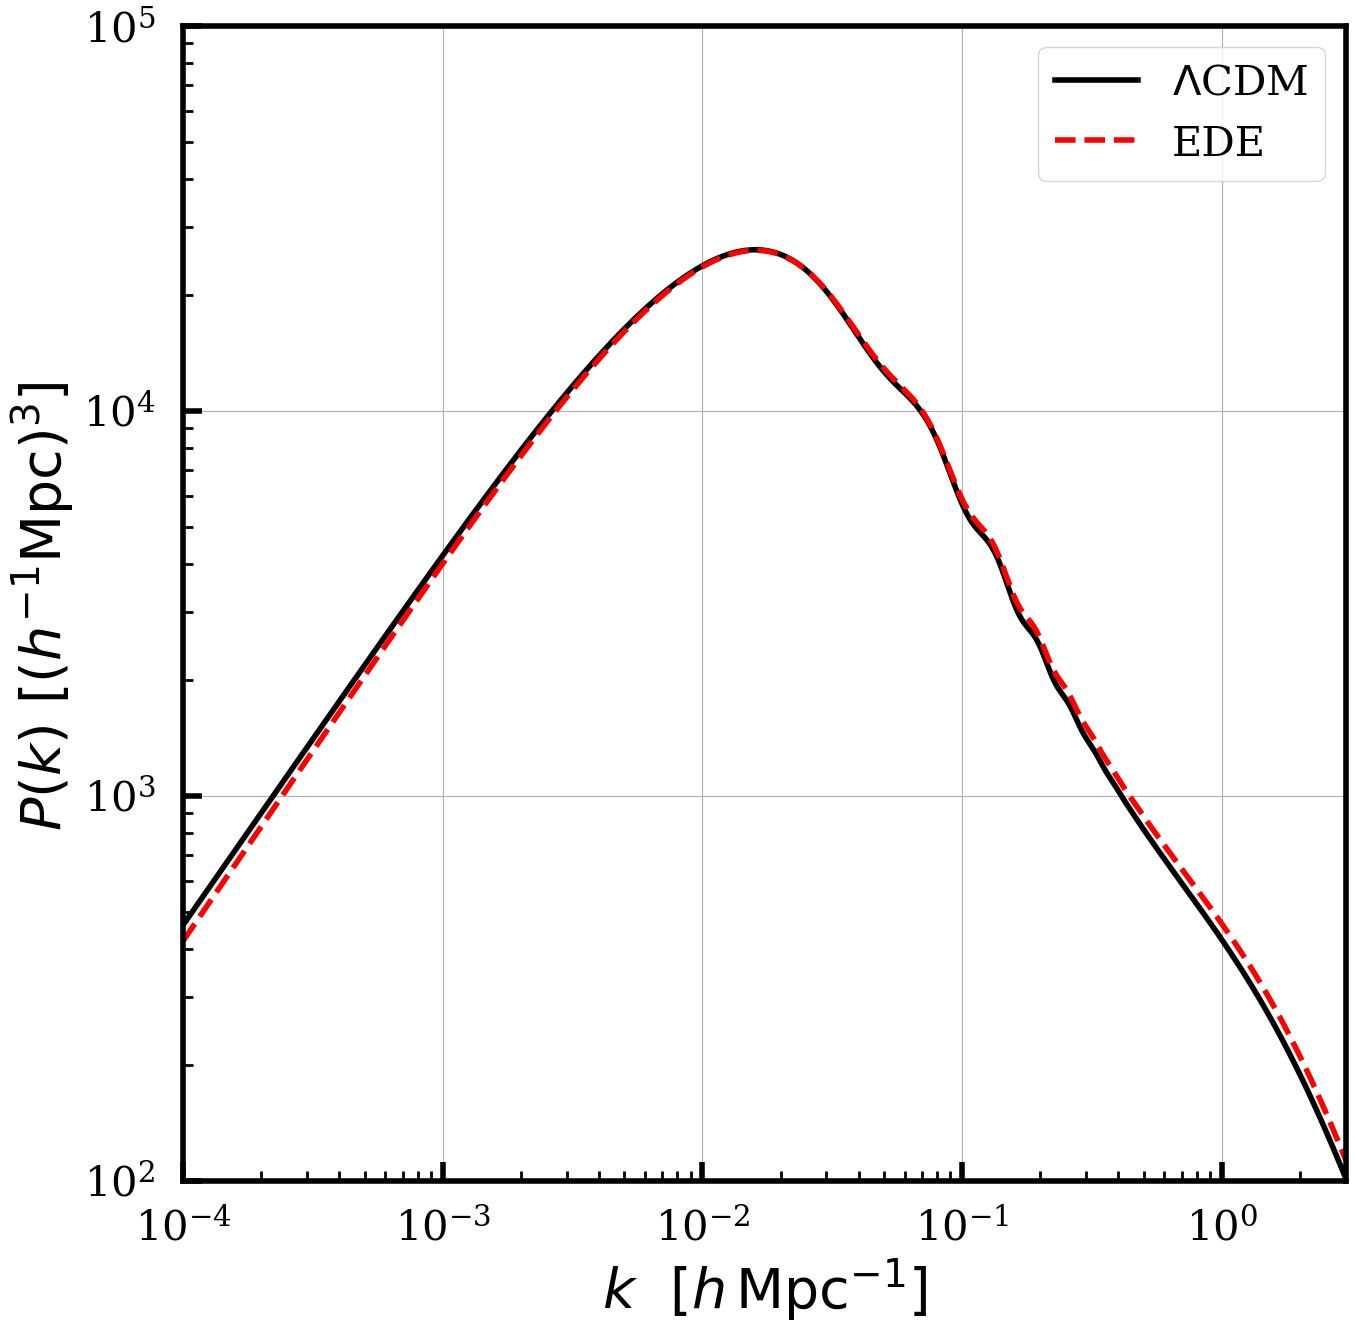

In [7]:
plt.figure(figsize=(15,15))
plt.plot(kk,pkzLCDM0,c='k',lw=4,label=r'$\Lambda$CDM')
plt.plot(kk,pkzEDE0,c='r',lw=4,ls='--',label='EDE')
plt.yscale('log')
plt.xscale('log')
plt.xlim([kk[0],kk[-1]])
leg = plt.legend(frameon=True);
plt.grid()
plt.xlabel(r'$k$  $[h\, {\rm Mpc}^{-1}]$')
plt.tick_params(pad=20)
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')

plt.ylabel(r'$ P(k) ~ [ (h^{-1}{\rm Mpc})^3 ] $ ')
plt.ylim([1e2,1e5])
plt.xlim([kk[0],kk[-1]])
plt.savefig('../figures-for-paper/mPk/Pkh.pdf',bbox_inches='tight')

## Figure 5

In this section we will plot the ratio $P(k)^{EDE} \left/ P(k)^{\Lambda CDM}\right.$ at redshifts correponding to those of the Dark Energy Survey (DES) and, for direct comparison, $z = 0$.

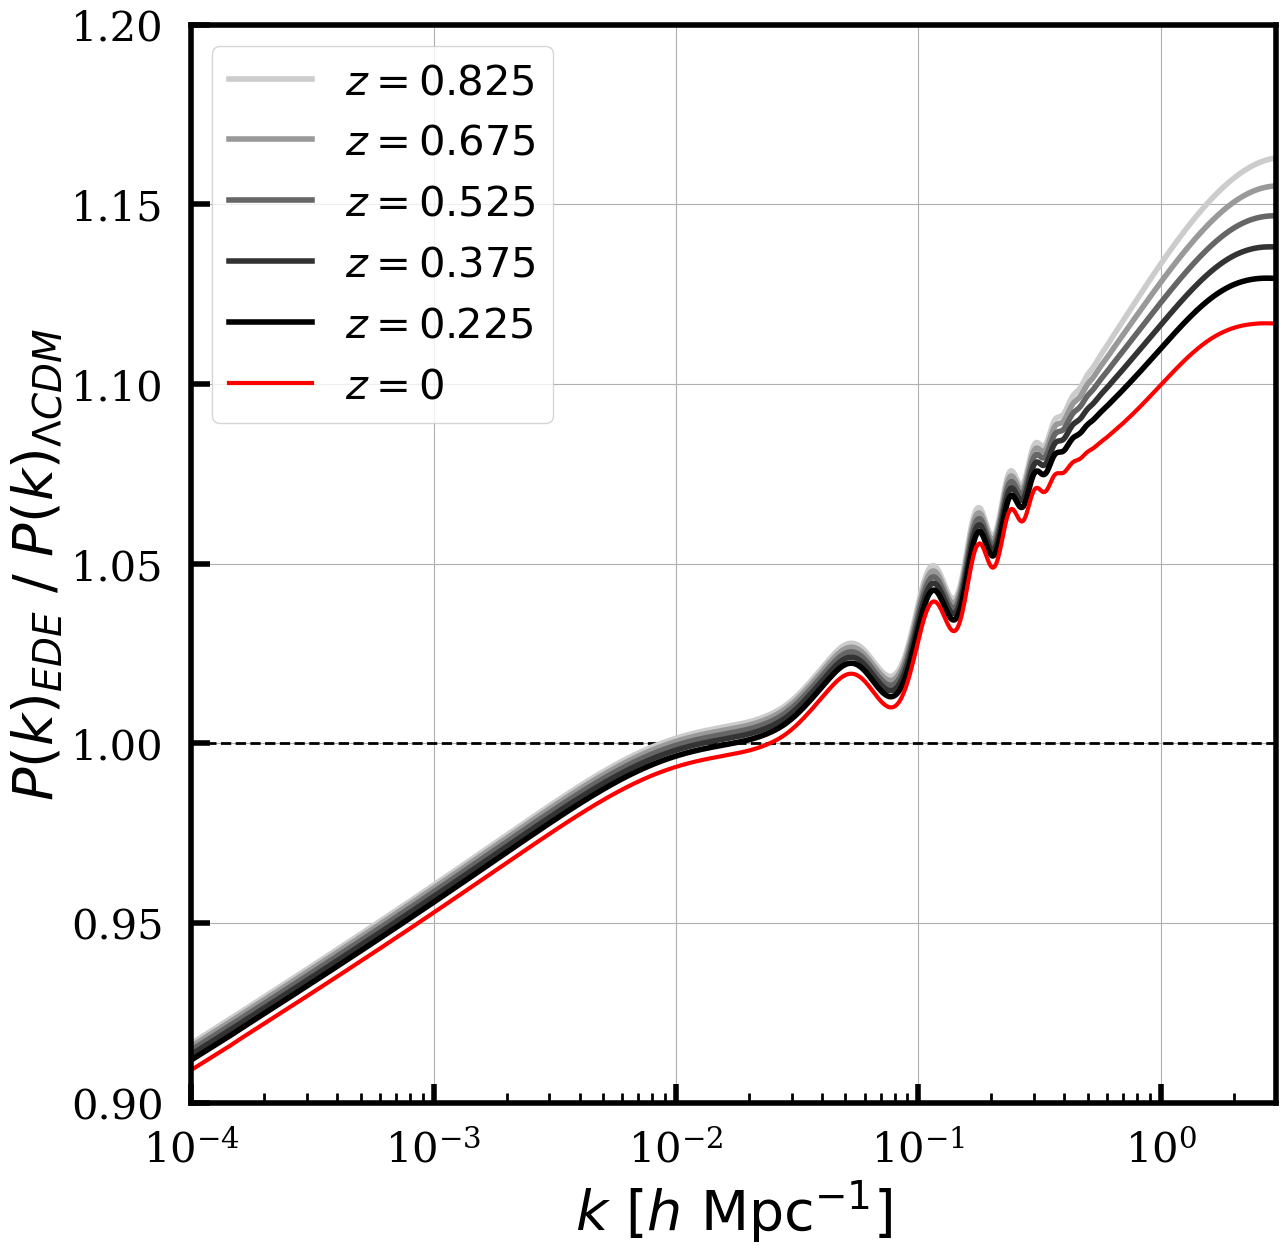

In [8]:
plt.figure(figsize=(14,14))
plt.axhline(1,c='k',lw=2,ls='--')
plt.plot(kk,pkzratio[:,4],color="0.8",lw=4,label=r'$z=0.825$')
plt.plot(kk,pkzratio[:,3],color="0.6",lw=4,label=r'$z=0.675$')
plt.plot(kk,pkzratio[:,2],color="0.4",lw=4,label=r'$z=0.525$')
plt.plot(kk,pkzratio[:,1],color="0.2",lw=4,label=r'$z=0.375$')
plt.plot(kk,pkzratio[:,0],color="0.0",lw=4,label=r'$z=0.225$')
plt.plot(kk,pkzratio0,color="r",lw=3,label='$z=0$')
plt.grid()
plt.xscale('log')
plt.tick_params(pad=20)
plt.legend(loc='upper left')
plt.xlabel(r'$k ~ [h ~ {\rm Mpc}^{-1}]$')
plt.ylabel(r'$ P(k)_{EDE} ~ \left/ ~ P(k)_{\Lambda CDM} \right. $')
plt.xlim([kk[0],kk[-1]])
plt.ylim([.9,1.20])
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.savefig('../figures-for-paper/mPk/PkDiffOnePlot-ratio.pdf',bbox_inches='tight')

## Figure 6

In this section we calulate the $P(k)^{EDE} \left/ P(k)^{\Lambda CDM}\right.$ at various values of $f_{EDE}$ while holding all other parameters fixed to their best fit value.

In [9]:
std_par = {'h':.7219,
           'thetai_scf' : 2.83,
           'A_s': 2.215e-09, 
           'n_s': 0.9889, 
           'omega_b': 0.02253, 
           'omega_cdm': 0.1306, 
           'm_ncdm': 0.06, 
           'tau_reio': 0.072,
           'non linear':'halofit',
           'N_ncdm':1, 
           'N_ur':2.0328, 
           'Omega_Lambda':0.0, 
           'Omega_fld':0, 
           'Omega_scf':-1,
           'n_scf':3, 
           'CC_scf':1, 
           'scf_parameters':'1, 1, 1, 1, 1, 0.0', 
           'scf_tuning_index':3, 
           'attractor_ic_scf':'no', 
           'output':'tCl pCl lCl mPk', 
           'lensing':'yes', 
           'l_max_scalars':2508, 
           'P_k_max_h/Mpc':15,
           'z_max_pk':1.}

In [10]:
#f_{EDE}=.04
EDE1 = Class()
EDE1.set({'log10z_c': 3.562, 'fEDE': 0.04})
EDE1.set(std_par)
EDE1.compute()

#f_{EDE}=.08
EDE2 = Class()
EDE2.set({'log10z_c': 3.562, 'fEDE': 0.08})
EDE2.set(std_par)
EDE2.compute()

#f_{EDE}=.12
EDE3 = Class()
EDE3.set({'log10z_c': 3.562, 'fEDE': 0.12})
EDE3.set(std_par)
EDE3.compute()

#f_{EDE}=.16
EDE4 = Class()
EDE4.set({'log10z_c': 3.562, 'fEDE': 0.16})
EDE4.set(std_par)
EDE4.compute()

#f_{EDE}=.20
EDE5 = Class()
EDE5.set({'log10z_c': 3.562, 'fEDE': 0.20})
EDE5.set(std_par)
EDE5.compute()

#f_{EDE}=.24
EDE6 = Class()
EDE6.set({'log10z_c': 3.562, 'fEDE': 0.24})
EDE6.set(std_par)
EDE6.compute()

In [11]:
pkzEDE1 = np.zeros(len(kk))
pkzEDE2 = np.zeros(len(kk))
pkzEDE3 = np.zeros(len(kk))
pkzEDE4 = np.zeros(len(kk))
pkzEDE5 = np.zeros(len(kk))
pkzEDE6 = np.zeros(len(kk))
pkzratio1 = np.zeros(len(kk))
pkzratio2 = np.zeros(len(kk))
pkzratio3 = np.zeros(len(kk))
pkzratio4 = np.zeros(len(kk))
pkzratio5 = np.zeros(len(kk))
pkzratio6 = np.zeros(len(kk))


for kindex in range(len(kk)):
    pkzEDE1[kindex] = (EDE1.h()**3)*EDE1.pk(kMpcEDE[kindex],0)
    pkzratio1[kindex] = (pkzEDE1[kindex])/pkzLCDM0[kindex]
    pkzEDE2[kindex] = (EDE2.h()**3)*EDE2.pk(kMpcEDE[kindex],0)
    pkzratio2[kindex] = (pkzEDE2[kindex])/pkzLCDM0[kindex]
    pkzEDE3[kindex] = (EDE3.h()**3)*EDE3.pk(kMpcEDE[kindex],0)
    pkzratio3[kindex] = (pkzEDE3[kindex])/pkzLCDM0[kindex]
    pkzEDE4[kindex] = (EDE4.h()**3)*EDE4.pk(kMpcEDE[kindex],0)
    pkzratio4[kindex] = ( pkzEDE4[kindex])/pkzLCDM0[kindex]
    pkzEDE5[kindex] = (EDE5.h()**3)*EDE5.pk(kMpcEDE[kindex],0)
    pkzratio5[kindex] = ( pkzEDE5[kindex])/pkzLCDM0[kindex]
    pkzEDE6[kindex] = (EDE6.h()**3)*EDE6.pk(kMpcEDE[kindex],0)
    pkzratio6[kindex] = (pkzEDE6[kindex])/pkzLCDM0[kindex]

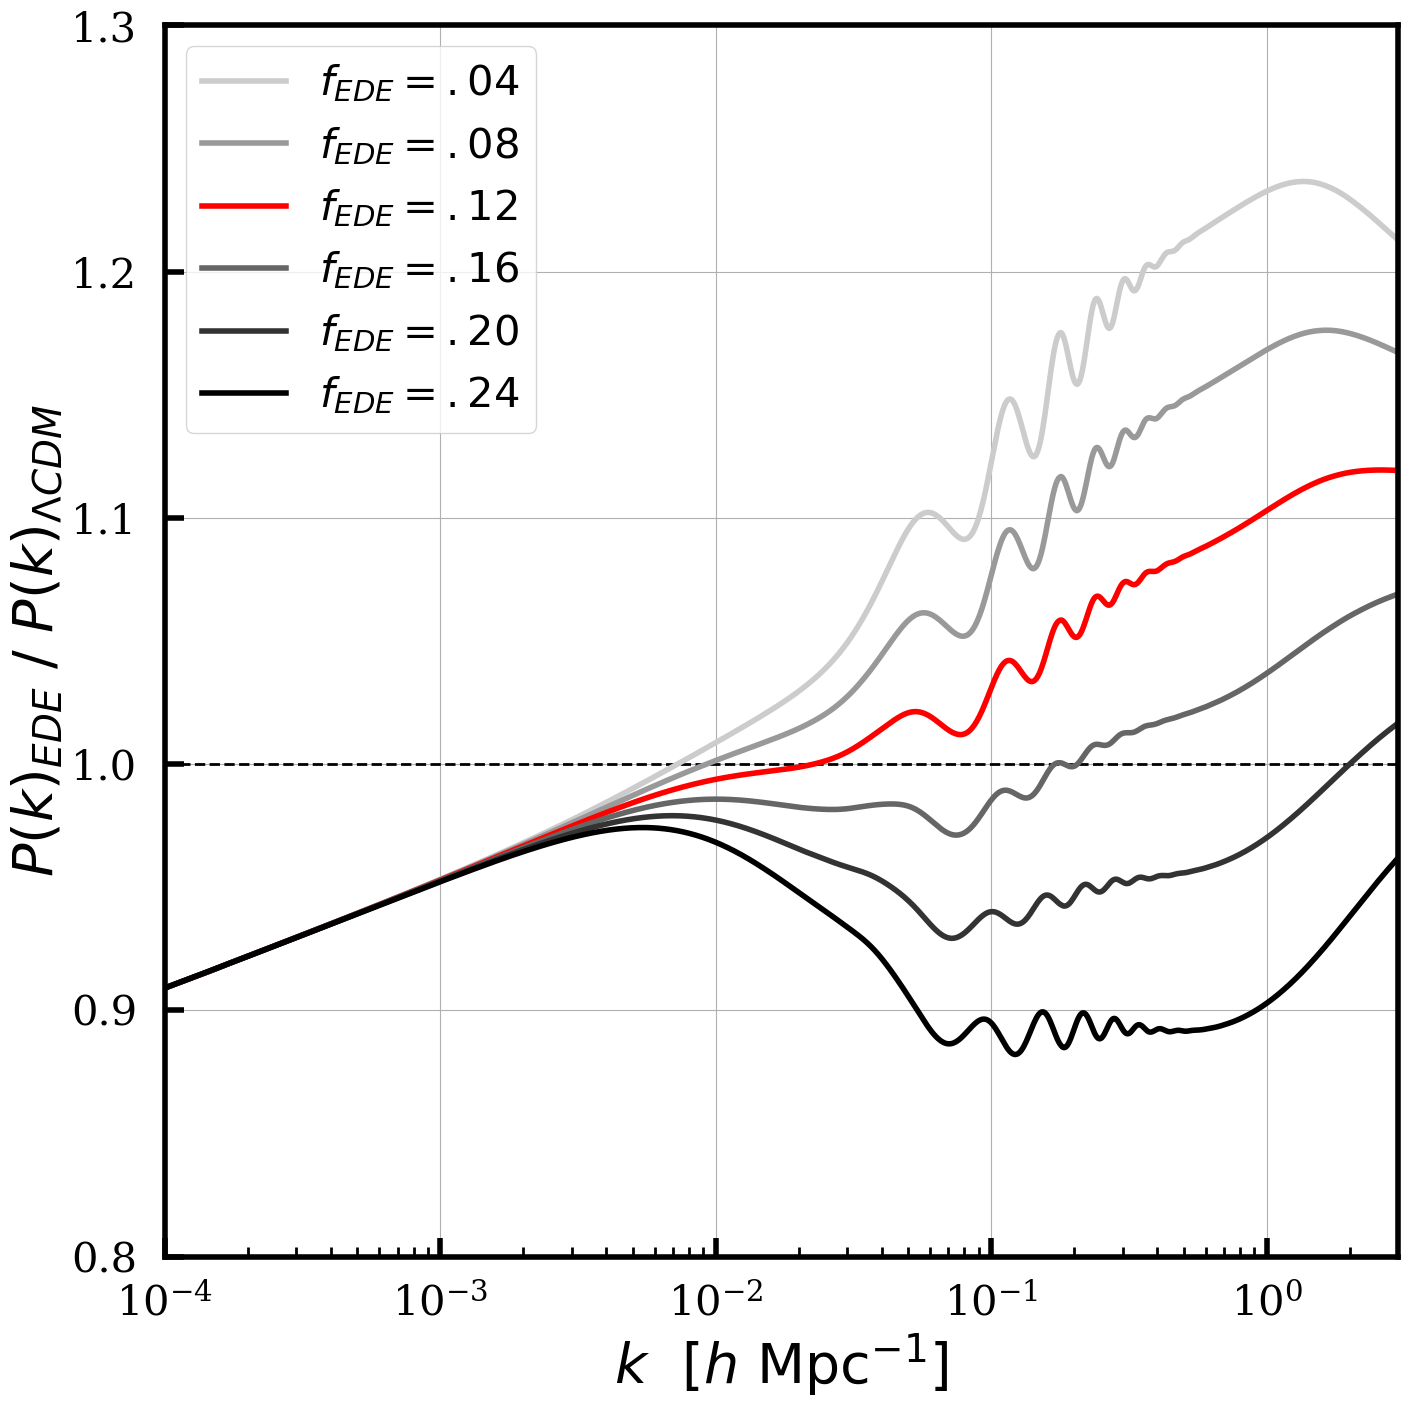

In [12]:
plt.figure(figsize=(14,14))
plt.axhline(1,c='k',lw=2,ls='--')
plt.plot(kk,pkzratio1,color="0.8",lw=4,label='$f_{EDE}=.04$')
plt.plot(kk,pkzratio2,color="0.6",lw=4,label='$f_{EDE}=.08$')
plt.plot(kk,pkzratio3,color="r",lw=4,label='$f_{EDE}=.12$')
plt.plot(kk,pkzratio4,color="0.4",lw=4,label='$f_{EDE}=.16$')
plt.plot(kk,pkzratio5,color="0.2",lw=4,label='$f_{EDE}=.20$')
plt.plot(kk,pkzratio6,color="0",lw=4,label='$f_{EDE}=.24$')
plt.xscale('log')
plt.xlim([kk[0],kk[-1]])
plt.ylim([.8,1.3])
plt.legend(loc='upper left')
plt.grid()
plt.xlabel(r'$k$  $[h ~ {\rm Mpc}^{-1}]$')
plt.ylabel(r'$ P(k)_{EDE} ~ \left/ ~ P(k)_{\Lambda CDM}\right. $')
plt.tight_layout()
plt.tick_params(pad=20)
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.savefig('../figures-for-paper/mPk/PkDiff_fEDE.pdf',bbox_inches='tight')

## Figure 7

In this section we calulate the $P(k)^{EDE} \left/ P(k)^{\Lambda CDM}\right.$ at various values of $z_{c}$ while holding all other parameters fixed to their best fit value.

In [13]:
#log10z_c = 3.0
EDE1 = Class()
EDE1.set({'log10z_c': 3.0, 'fEDE': 0.12})
EDE1.set(std_par)
EDE1.compute()

#log10z_c = 3.25
EDE2 = Class()
EDE2.set({'log10z_c': 3.25, 'fEDE': 0.12})
EDE2.set(std_par)
EDE2.compute()

#log10z_c = 3.562
EDE3 = Class()
EDE3.set({'log10z_c': 3.562, 'fEDE': 0.12})
EDE3.set(std_par)
EDE3.compute()

#log10z_c = 3.75
EDE4 = Class()
EDE4.set({'log10z_c': 3.75, 'fEDE': 0.12})
EDE4.set(std_par)
EDE4.compute()

#log10z_c = 4.0
EDE5 = Class()
EDE5.set({'log10z_c': 4.0, 'fEDE': 0.12})
EDE5.set(std_par)
EDE5.compute()

#log10z_c = 4.25
EDE6 = Class()
EDE6.set({'log10z_c': 4.25, 'fEDE': 0.12})
EDE6.set(std_par)
EDE6.compute()

In [14]:
pkzEDE1 = np.zeros(len(kk))
pkzEDE2 = np.zeros(len(kk))
pkzEDE3 = np.zeros(len(kk))
pkzEDE4 = np.zeros(len(kk))
pkzEDE5 = np.zeros(len(kk))
pkzEDE6 = np.zeros(len(kk))
pkzratio1 = np.zeros(len(kk))
pkzratio2 = np.zeros(len(kk))
pkzratio3 = np.zeros(len(kk))
pkzratio4 = np.zeros(len(kk))
pkzratio5 = np.zeros(len(kk))
pkzratio6 = np.zeros(len(kk))

for kindex in range(len(kk)):
    pkzEDE1[kindex] = (EDE1.h()**3)*EDE1.pk(kMpcEDE[kindex],0)
    pkzratio1[kindex] = (pkzEDE1[kindex])/pkzLCDM0[kindex]
    pkzEDE2[kindex] = (EDE2.h()**3)*EDE2.pk(kMpcEDE[kindex],0)
    pkzratio2[kindex] = (pkzEDE2[kindex])/pkzLCDM0[kindex]
    pkzEDE3[kindex] = (EDE3.h()**3)*EDE3.pk(kMpcEDE[kindex],0)
    pkzratio3[kindex] = (pkzEDE3[kindex])/pkzLCDM0[kindex]
    pkzEDE4[kindex] = (EDE4.h()**3)*EDE4.pk(kMpcEDE[kindex],0)
    pkzratio4[kindex] = ( pkzEDE4[kindex])/pkzLCDM0[kindex]
    pkzEDE5[kindex] = (EDE5.h()**3)*EDE5.pk(kMpcEDE[kindex],0)
    pkzratio5[kindex] = ( pkzEDE5[kindex])/pkzLCDM0[kindex]
    pkzEDE6[kindex] = (EDE6.h()**3)*EDE6.pk(kMpcEDE[kindex],0)
    pkzratio6[kindex] = (pkzEDE6[kindex])/pkzLCDM0[kindex]

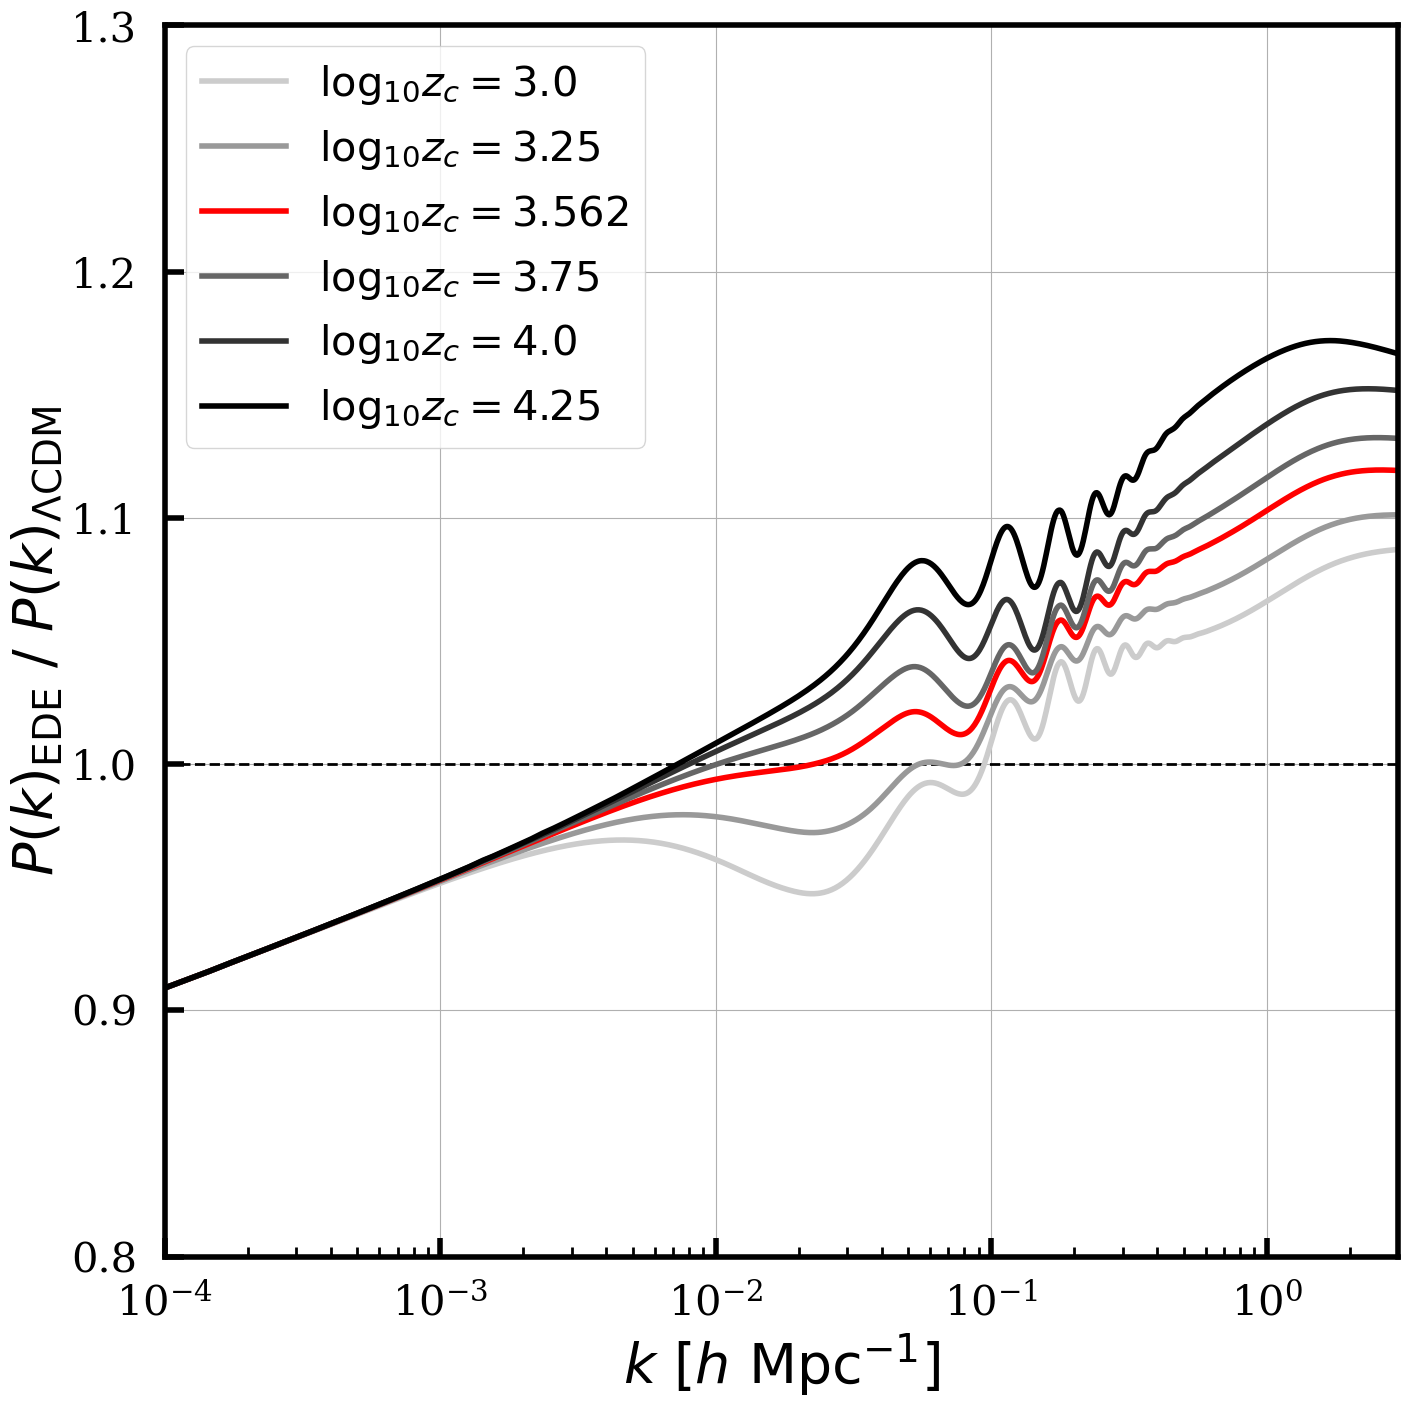

In [15]:
plt.figure(figsize=(14,14))
plt.axhline(1,c='k',lw=2,ls='--')
plt.plot(kk,pkzratio1,color="0.8",lw=4,label='$\log_{10}z_c=3.0$')
plt.plot(kk,pkzratio2,color="0.6",lw=4,label='$\log_{10}z_c=3.25$')
plt.plot(kk,pkzratio3,color="r",lw=4,label='$\log_{10}z_c=3.562$')
plt.plot(kk,pkzratio4,color="0.4",lw=4,label='$\log_{10}z_c=3.75$')
plt.plot(kk,pkzratio5,color="0.2",lw=4,label='$\log_{10}z_c=4.0$')
plt.plot(kk,pkzratio6,color="0",lw=4,label='$\log_{10}z_c=4.25$')
plt.xscale('log')
plt.xlim([kk[0],kk[-1]])
plt.ylim([.8,1.3])
plt.legend(loc='upper left')
plt.grid()
plt.xlabel(r'$k ~ [h ~ {\rm Mpc}^{-1}]$')
plt.ylabel(r'$P(k)_{{\rm EDE}} ~ \left/ ~ P(k)_{{\rm\Lambda CDM}} \right.$')
plt.tight_layout()
plt.tick_params(pad=20)
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.savefig('../figures-for-paper/mPk/PkDiff_zc.pdf',bbox_inches='tight')